In [1]:
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

In [2]:
def simple_gompertz_function(x, a, b, k, e):
    exp = - np.exp(k * (b - x))
    return a * np.exp(exp) + e

def double_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return g1 + g2 + e

def simple_logistic_function(x, a, b, k, e):
    d = k * (b - np.array(x))
    return (a / (1 + np.exp(d))) + e

def double_logistic_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    l1 = a1 / (1 + np.exp(d1))
    d2 = k2 * (b2 - np.array(x))
    l2 = (a2 - a1) / (1 + np.exp(d2))
    return l1 + l2 + e

In [3]:
today = dt.datetime.now().strftime("%Y-%m-%d")
df = pd.read_pickle(f"data-confirmed-{today}.pkl")

In [4]:
countries = df["measured"].size
start = pd.Timestamp("2020-01-22")
period = df["measured"]["China"].size
end = start + pd.Timedelta(days=period)

errors = []
values = 0
for f in df.columns:
    if f == "measured":
        continue
    for c in df[f].index:
        if not df[f][c]:
            errors.append(f"{c} with {''.join(w[0] for w in f.split(' '))}")
            continue
        values += df[f][c].best_fit.size

# Abstract

In [12]:
display(
    Markdown(f"""
Four different models have been compared for fitting SARS-nCoV-2 total cumulative cases curves in 
{countries} countries over a period of {period} days. Evaluated models have been: _Simple Logistic Function_ (**SLF**), 
_Simple Gompertz Function_ (**SGF**), _Double Logistic Function_ (**DLF**) and _Double Gompertz Function_ (**DGF**). 
**DGF** model showed lower MSE, RMSE, NRMSE, MAE, NAE and higher Pearson R compared to the others. 
$R^2$ ($p>.99$), $R^2_{{adj}}$ ($p>.99$), $\Delta$AIC ($p<.55$) and $\Delta$BIC ($p>0$) showed higher 
percentages for **DGF** compared with the others.

Results suggest that _Double Gompertz Function_ may be a good fitting model for SARS-nCoV-2 cumulative cases curve.
    """    
    )
)


Four different models have been compared for fitting SARS-nCoV-2 total cumulative cases curves in 
187 countries over a period of 103 days. Evaluated models have been: _Simple Logistic Function_ (**SLF**), 
_Simple Gompertz Function_ (**SGF**), _Double Logistic Function_ (**DLF**) and _Double Gompertz Function_ (**DGF**). 
**DGF** model showed lower MSE, RMSE, NRMSE, MAE, NAE and higher Pearson R compared to the others. 
$R^2$ ($p>.99$), $R^2_{adj}$ ($p>.99$), $\Delta$AIC ($p<.55$) and $\Delta$BIC ($p>0$) showed higher 
percentages for **DGF** compared with the others.

Results suggest that _Double Gompertz Function_ may be a good fitting model for SARS-nCoV-2 cumulative cases curve.
    

# Methods

## Data

In [6]:
display(
    Markdown(f"""
SARS-nCoV-2 total cumulative cases data have been gathered from Johns Hopkins University GitHub 
repository <cite data-cite="jhu"></cite> and summed into single countries where regional level 
was provided <cite data-cite="maxdevblock"></cite>. 
Data have been used "as is" without rejecting any outlier and/or error (negative daily $\Delta$).
Data and results have been stored in a `pandas` n-dimensional `DataFrame`.

Raw data contained {countries} countries and daily cumulative confirmed cases for 
{period} days, from 2020-01-22 to {end.strftime('%Y-%m-%d')}.
    """)
)
display(
    Markdown(f"""
Data have been collected from: {", ".join(df["measured"].index)}.
    """)
)


SARS-nCoV-2 total cumulative cases data have been gathered from Johns Hopkins University GitHub 
repository <cite data-cite="jhu"></cite> and summed into single countries where regional level 
was provided <cite data-cite="maxdevblock"></cite>. 
Data have been used "as is" without rejecting any outlier and/or error (negative daily $\Delta$).
Data and results have been stored in a `pandas` n-dimensional `DataFrame`.

Raw data contained 187 countries and daily cumulative confirmed cases for 
103 days, from 2020-01-22 to 2020-05-04.
    


Data have been collected from: Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Burkina Faso, Burma, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo (Brazzaville), Congo (Kinshasa), Costa Rica, Cote d'Ivoire, Croatia, Cuba, Cyprus, Czechia, Denmark, Diamond Princess, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Holy See, Honduras, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea, South, Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lebanon, Liberia, Libya, Liechtenstein, Lithuania, Luxembourg, MS Zaandam, Madagascar, Malawi, Malaysia, Maldives, Mali, Malta, Mauritania, Mauritius, Mexico, Moldova, Monaco, Mongolia, Montenegro, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, North Macedonia, Norway, Oman, Pakistan, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Russia, Rwanda, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, San Marino, Sao Tome and Principe, Saudi Arabia, Senegal, Serbia, Seychelles, Sierra Leone, Singapore, Slovakia, Slovenia, Somalia, South Africa, South Sudan, Spain, Sri Lanka, Sudan, Suriname, Sweden, Switzerland, Syria, Taiwan*, Tajikistan, Tanzania, Thailand, Timor-Leste, Togo, Trinidad and Tobago, Tunisia, Turkey, US, Uganda, Ukraine, United Arab Emirates, United Kingdom, Uruguay, Uzbekistan, Venezuela, Vietnam, West Bank and Gaza, Western Sahara, Yemen, Zambia, Zimbabwe.
    

## Models

Models have been defined with `lmfit` (implementation of classical `curve_fit` in `scipy`) using Nelder-Mead method for fitting <cite data-cite="maxdevblock"></cite>.

Total residual from each function have been initially compared (unsorted, sorted, gaussian distribution) to find the model with residual $\mu$ closer to $0$ and shorter $\sigma$. _Akaike Information Criterion_ differences ($\Delta$**AIC**) in relative probability density space, _Bayesian Information Criterion_ differences ($\Delta$**BIC**), $R^2$ and $R^2_{adj}$ coefficients mean have been used to find the likely better fitting model that has been finally compared, country by country. See [Appendix](#Appendix) for formulae.

Models have been defined as follow:

- Simple Logisic Function (**SLF**):

```python
def simple_logistic_function(x, a, b, k, e):
    d = k * (b - np.array(x))
    return (a / (1 + np.exp(d))) + e

```
$$ f(t) = \frac{ a }{ 1 + e^{ k (b - t) } } + \varepsilon $$

- Double Logisic Function (**DLF**):

```python
def double_logistic_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    g1 = a1 / (1 + np.exp(d1))
    d2 = k2 * (b2 - np.array(x))
    g2 = (a2 - a1) / (1 + np.exp(d2))
    return g1 + g2 + e
```
$$ f(t) = \frac{ a_1 }{ 1 + e^{ k_1 (b_1 - t) } } + \frac{ a_2 - a_1 }{ 1 + e^{ k_2 (b_2 - t) } } + \varepsilon $$

- Simple Gompertz Function (**SGF**):

```python
def simple_gompertz_function(x, a, b, k, e):
    exp = - np.exp(k * (b - x))
    return a * np.exp(exp) + e
```
$$ f(t) = a \cdot e^{ -e^{ k (b - t) } } + \varepsilon $$

- Double Gompertz Function (**DGF**):

```python
def double_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return g1 + g2 + e
```
$$ f(t) = a_1 \cdot e^{ -e^{ k_1 (b_1 - t) } } + (a_2 - a_1) \cdot e^{ -e^{ k_2 (b_2 - t) } } + \varepsilon $$

# Model fitting

Fitting has been performed with `lmfit` using Nelder-Mead method

```python
model = lmfit.Model(function)
result = model.fit(data=y, params=p, x=x, method='Nelder', nan_policy='omit')
```

initial parameters `p` have been guessed as follows (where $y$ are observed values):

- **SLF** and **SGF**

```python
p = model.make_params(
    a=y[-1],
    b=max_y_i,
    k=.1,
    e=y[0]
)
```

$$ a = y_{-1} $$
$$ b = x_{\mathbf{max}(dy)} $$
$$ k = 0.1 $$
$$ \varepsilon = y_0 $$

- **DLF** and **DGF**

```python
p = model.make_params(
    a1=y[max_y_i] * 2,
    b1=max_y_i,
    k1=.1,
    a2=max(y),
    b2=len(y),
    k2=.1,
    e=y[0]
)
```

$$ a_1 = 2 y_{\mathbf{max}(dy)} $$
$$ b_1 = x_{\mathbf{max}(dy)} $$
$$ k_1 = 0.1 $$
$$ a_2 = \mathbf{max}(y) $$
$$ b_2 = x_{y_{-1}} $$
$$ k_2 = 0.1 $$
$$ \varepsilon = y_0$$

In [7]:
display(
    Markdown(f"""
Fitting failed for {len(errors)} countries ({", ".join(errors)}) returning best fit information from {countries} countries, 
for a total of {countries*period} observed and {values} predicted values.

Complete `python` backend for data gathering, fitting and analysis along 
with a `pickle` saved dataframe of all measured data and results is online 
avalaible <cite data-cite="maxdevblock"></cite>.
    """)
)


Fitting failed for 1 countries (Saint Lucia with DLF) returning best fit information from 187 countries, 
for a total of 19261 observed and 76941 predicted values.

Complete `python` backend for data gathering, fitting and analysis along 
with a `pickle` saved dataframe of all measured data and results is online 
avalaible <cite data-cite="maxdevblock"></cite>.
    

Fitting examples are reported in figures [REF] [REF] [REF].

# Analysis

Several skill score have been used to evaluate to average skil and skill interpolating extreme values (outliers).

Mean absolute error (**MAE**) is a natural, unambiguous, measure of average error <cite data-cite="willmott2006use"></cite>. It shows the errors in the same unit as variables themselves. MAE is bounded below by 0 (best case) and unbounded above. Advantage over Mean Bias Error (**MBE**) is that, taking absolute error values, positive and negative errors can't cancel out <cite data-cite="hofstra2008comparison"></cite>.

Normalized Absolute Error (**NAE**), bounded below 0 (best case) and "virtually" unbounded above. If more than 1 errors are greater than observed values themselves. Advantage over Normalized Bias Error (**NBE**) is that, taking absolute error values, positive and negative errors can't cancel out. [REF]

Mean Squared Error (**MSE**), variance, taking the square of residual is highly sensitive to large outliers <cite data-cite="hofstra2008comparison"></cite>. Bounded below 0 (best case) and unbounded above.

Root Mean Squared Error (**RMSE**) is very commonly used as a measure of deviation from the observed value. Although it has been criticized as being ambiguous <cite data-cite="willmott2006use"></cite> and its dependence on the squared error means that it is not resistant to outliers deviating from a Gaussian distribution. It has been included because of its sensitivity to large outliers. Bounded below 0 (best case) and unbounded above.

Normalized Root Mean Squared Error (**NRMSE**) allows to compare **RMSE** of different models, normalized on observed values, on a $(0, 1]$ scale [REF].

Pearson Correlation coefficient (**Pearson R**) depends on squared deviations and so is not a resistant measure. However, this statistic removes the effect of any bias in the interpolated data. Problems with correctly capturing the variance will not be highlighted as the measure normalizes the observed and modeled values by their standard deviations <cite data-cite="hofstra2008comparison"></cite>. The statistic is standardized. However, because of its insensitivity to biases and errors in variance, the correlation coefficient should be considered as a measure of potential skill <cite data-cite="murphy1989skill"></cite>.

$R^2$ coefficient test ...
Bounded from $0$ to $1$, $R^2 > .99$ has been fixed to evaluate model $H_0$ against alternative model $H_1$ <cite data-cite="fitcurves"></cite>.

$R^2_{adj}$ coefficient test ...
Bounded from $0$ to $1$, $R^2_{adj} > .99$ has been fixed to evaluate model $H_0$ against alternative model $H_1$ <cite data-cite="fitcurves"></cite>.

Akaike Information Criterion (**AIC**), its score (or weight) and its relative probability distribution space ...
Within the probability distribution space, bounded from $0$ to $1$, a $\Delta\mathbf{AIC}_p$ value less than $0.5$ means model $H_0$ has more chances to be better fitting than alternative model $H_1$ <cite data-cite="motulsky2002comparing"></cite>.

Bayesian Information Criterion (**BIC**) and its delta ...
A $\Delta\mathbf{BIC} > 0$ means model $H_0$ has evidence to be better fitting than alternative model $H_1$. Look in Appendix for formulae <cite data-cite="fabozzi2014basics"></cite>.

## Analysis Example

Example of analysis of two fitting models for a noisy observed sample.

Observed $o$ values are generated by

$$
o = f(x) = a \cdot x^2 + b + \varepsilon_x
$$

where $x=(0, 100]$, $a=2.3$, $b=1000$ and $\varepsilon_x$ is a random noise $(0, 3000]$.

Observed are fitted with two models using `scipy.optimize.curve_fit` (least squares method):

$$
e_1(x) = a \cdot x^3
$$

and

$$
e_2(x) = a \cdot x^2 + b
$$

Model $e_2$ is taken as null hypothesis $H_0$.

***

```python
import numpy as np
from scipy import stats as sts
from scipy.optimize import curve_fit
import sklearn.metrics as skl
from matplotlib import pyplot as plt

def AICp(diff):
    try:
        return np.exp(-.5 * diff) / (1 + np.exp(-.5 * diff))
    except Exception as err:
        if diff > 0:
            return 1.
        return 0.

def func_noise(x, a, b, err=False):
    noise = np.random.normal(0, 3e3, len(x))
    return a * np.array(x) ** 2 + b + (noise if err else 0)

def func1(x, a):
    return a * np.array(x) ** 3

def func2(x, a, b):
    return a * np.array(x) ** 2 + b

def report(o, E, P):
    cT = []
    mae, nae, mbe, nbe, mse, rmse, nrmse, r, r2, r2a, aic, bic = (
        [] for _ in range(12)
    )
    for i, e in enumerate(E):
        mae.append(skl.mean_absolute_error(o, e))
        nae.append(np.sum(np.abs(o - e)) / np.sum(o))
        mbe.append(np.sum(o - e) / len(o))
        nbe.append(np.sum(o - e) / np.sum(o))
        _mse = skl.mean_squared_error(o, e)
        mse.append(_mse)
        _rmse = np.sqrt(_mse)
        rmse.append(_rmse)
        _nrmse = _rmse / np.sum(o)
        nrmse.append(_nrmse)
        r.append(sts.pearsonr(o, e)[0])
        r2.append(skl.r2_score(o, e))
        rss = np.sum(np.abs(o - e) ** 2)
        tss = np.sum(np.abs(o - np.mean(o)) ** 2)
        r2a.append(1 - (rss / tss) * ((len(o) - 1) / (len(o) - P[i] - 1)))
        aic.append(len(o) * np.log(rss / len(o)) + 2 * 1)
        bic.append(len(o) * np.log(rss / len(o)) + np.log(len(o)) * P[i])
    cT.append([f"{mae[0]:.0f}", f"{mae[1]:.0f}", f"{(mae[0]-mae[1]):.0f}"])
    cT.append([f"{nae[0]}", f"{nae[1]}", f"{(nae[0]-nae[1])}"])
    cT.append([f"{mbe[0]:.0f}", f"{mbe[1]}", f"{(mbe[0]-mbe[1]):.0f}"])
    cT.append([f"{nbe[0]}", f"{nbe[1]}", f"{(nbe[0]-nbe[1])}"])
    cT.append([f"{mse[0]:.0f}", f"{mse[1]:.0f}", f"{(mse[0]-mse[1]):.0f}"])
    cT.append([f"{rmse[0]:.0f}", f"{rmse[1]:.0f}", f"{(rmse[0]-rmse[1]):.0f}"])
    cT.append([f"{nrmse[0]}", f"{nrmse[1]}", f"{(nrmse[0]-nrmse[1])}"])
    cT.append([f"{r[0]}", f"{r[1]}", f"{(r[0]-r[1])}"])
    cT.append([f"{r2[0]}", f"{r2[1]}", f"{(r2[0]-r2[1])}"])
    cT.append([f"{r2a[0]}", f"{r2a[1]}", f"{(r2a[0]-r2a[1])}"])
    cT.append([f"{aic[0]:.0f}", f"{aic[1]:.0f}", f"$p$: {AICp(aic[0]-aic[1])}"])
    cT.append([f"{bic[0]:.0f}", f"{bic[1]:.0f}", f"{bic[0] - bic[1]:.0f}"])
    return cT

x = np.arange(0, 100)
o = func_noise(x, 2.3, 1e3, err=True)
popt1, _ = curve_fit(func1, x, o)
e1 = func1(x, *popt1)
popt2, _ = curve_fit(func2, x, o)
e2 = func2(x, *popt2)

cellText = report(o, [e1, e2], [1, 2])

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.xaxis.tick_top()
ax.axhline(0, lw=1, alpha=.25, c="k")
ax.plot(x, e1, label="$e_1$", lw=5, alpha=.5)
ax.plot(x, e2, label="$e_2$", lw=5, alpha=.5)
ax.scatter(x, o, label="$o$", s=4, c="k")
ax.legend(loc="best")
ax.table(
    cellText=cellText,
    colLabels=[
        "$e_1$  $\mathbf{H_1}$", "$e_2$  $\mathbf{H_0}$",
        "$\Delta = \mathbf{H_1} - \mathbf{H_0}$"
    ],
    colColours=["lightblue", "wheat", "lightgrey"],
    rowColours=["lightgrey" for _ in range(12)],
    rowLabels=[
        "MAE", "NAE", "MBE", "NBE", "MSE", "RMSE", "NRMSE",
        "$R$",  "$R^2$", "$R^2_{adj}$", "AIC", "BIC"
    ],
)
plt.show()
```

***

Fitting and analysis report (figure [REF]).

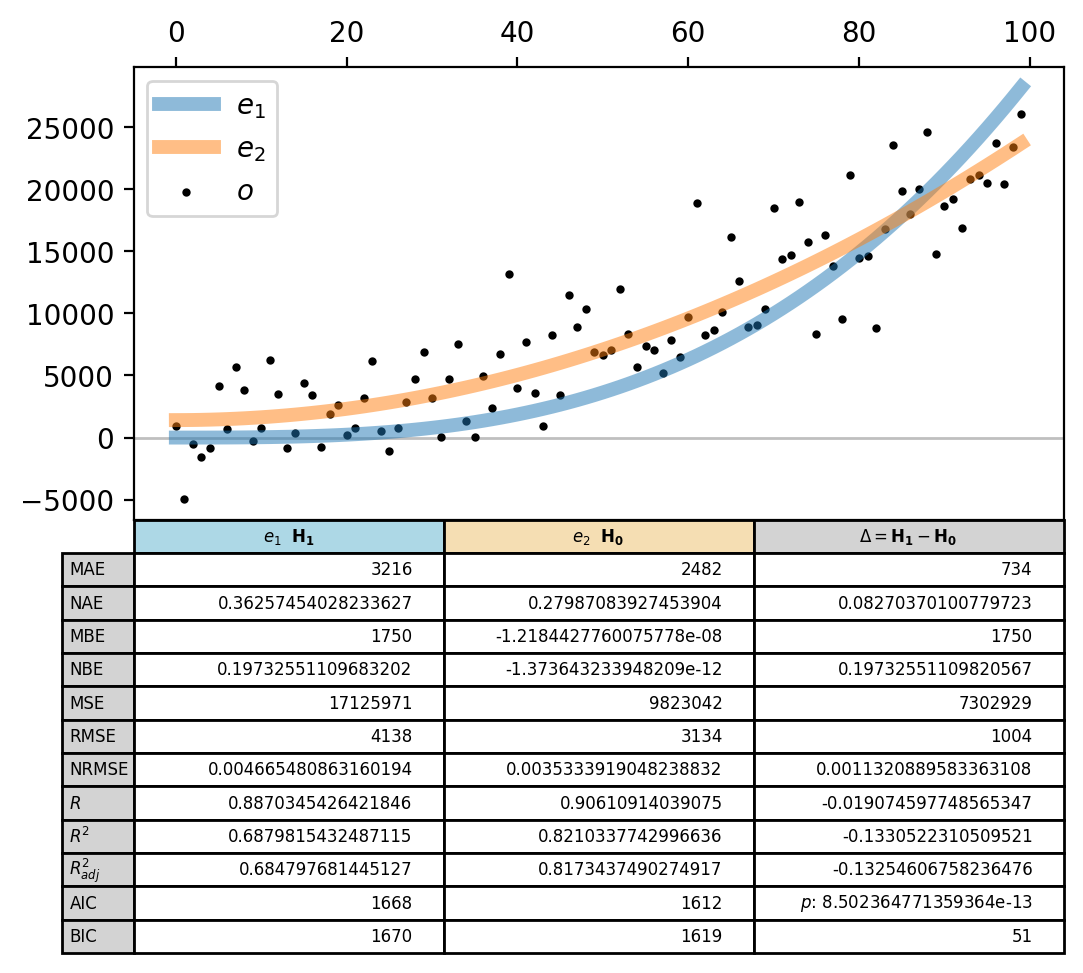

In [8]:
import numpy as np
from scipy import stats as sts
from scipy.optimize import curve_fit
import sklearn.metrics as skl
from matplotlib import pyplot as plt

def AICp(diff):
    try:
        return np.exp(-.5 * diff) / (1 + np.exp(-.5 * diff))
    except Exception as err:
        if diff > 0:
            return 1.
        return 0.

def func_noise(x, a, b, err=False):
    noise = np.random.normal(0, 3e3, len(x))
    return a * np.array(x) ** 2 + b + (noise if err else 0)

def func1(x, a):
    return a * np.array(x) ** 3

def func2(x, a, b):
    return a * np.array(x) ** 2 + b

def report(o, E, P):
    cT = []
    mae, nae, mbe, nbe, mse, rmse, nrmse, r, r2, r2a, aic, bic = (
        [] for _ in range(12)
    )
    for i, e in enumerate(E):
        mae.append(skl.mean_absolute_error(o, e))
        nae.append(np.sum(np.abs(o - e)) / np.sum(o))
        mbe.append(np.sum(o - e) / len(o))
        nbe.append(np.sum(o - e) / np.sum(o))
        _mse = skl.mean_squared_error(o, e)
        mse.append(_mse)
        _rmse = np.sqrt(_mse)
        rmse.append(_rmse)
        _nrmse = _rmse / np.sum(o)
        nrmse.append(_nrmse)
        r.append(sts.pearsonr(o, e)[0])
        r2.append(skl.r2_score(o, e))
        rss = np.sum(np.abs(o - e) ** 2)
        tss = np.sum(np.abs(o - np.mean(o)) ** 2)
        r2a.append(1 - (rss / tss) * ((len(o) - 1) / (len(o) - P[i] - 1)))
        aic.append(len(o) * np.log(rss / len(o)) + 2 * 1)
        bic.append(len(o) * np.log(rss / len(o)) + np.log(len(o)) * P[i])
    cT.append([f"{mae[0]:.0f}", f"{mae[1]:.0f}", f"{(mae[0]-mae[1]):.0f}"])
    cT.append([f"{nae[0]}", f"{nae[1]}", f"{(nae[0]-nae[1])}"])
    cT.append([f"{mbe[0]:.0f}", f"{mbe[1]}", f"{(mbe[0]-mbe[1]):.0f}"])
    cT.append([f"{nbe[0]}", f"{nbe[1]}", f"{(nbe[0]-nbe[1])}"])
    cT.append([f"{mse[0]:.0f}", f"{mse[1]:.0f}", f"{(mse[0]-mse[1]):.0f}"])
    cT.append([f"{rmse[0]:.0f}", f"{rmse[1]:.0f}", f"{(rmse[0]-rmse[1]):.0f}"])
    cT.append([f"{nrmse[0]}", f"{nrmse[1]}", f"{(nrmse[0]-nrmse[1])}"])
    cT.append([f"{r[0]}", f"{r[1]}", f"{(r[0]-r[1])}"])
    cT.append([f"{r2[0]}", f"{r2[1]}", f"{(r2[0]-r2[1])}"])
    cT.append([f"{r2a[0]}", f"{r2a[1]}", f"{(r2a[0]-r2a[1])}"])
    cT.append([f"{aic[0]:.0f}", f"{aic[1]:.0f}", f"$p$: {AICp(aic[0]-aic[1])}"])
    cT.append([f"{bic[0]:.0f}", f"{bic[1]:.0f}", f"{bic[0] - bic[1]:.0f}"])
    return cT

x = np.arange(0, 100)
o = func_noise(x, 2.3, 1e3, err=True)
popt1, _ = curve_fit(func1, x, o)
e1 = func1(x, *popt1)
popt2, _ = curve_fit(func2, x, o)
e2 = func2(x, *popt2)

cellText = report(o, [e1, e2], [1, 2])

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.xaxis.tick_top()
ax.axhline(0, lw=1, alpha=.25, c="k")
ax.plot(x, e1, label="$e_1$", lw=5, alpha=.5)
ax.plot(x, e2, label="$e_2$", lw=5, alpha=.5)
ax.scatter(x, o, label="$o$", s=4, c="k")
ax.legend(loc="best")
ax.table(
    cellText=cellText,
    colLabels=[
        "$e_1$  $\mathbf{H_1}$", "$e_2$  $\mathbf{H_0}$",
        "$\Delta = \mathbf{H_1} - \mathbf{H_0}$"
    ],
    colColours=["lightblue", "wheat", "lightgrey"],
    rowColours=["lightgrey" for _ in range(12)],
    rowLabels=[
        "MAE", "NAE", "MBE", "NBE", "MSE", "RMSE", "NRMSE",
        "$R$",  "$R^2$", "$R^2_{adj}$", "AIC", "BIC"
    ],
)
plt.show()

## Residual

Total residual from each model have been collected and compared to get a first "rough" evidence of the most likely better fitting model [FIG].

![img](residualstats3.png)

**DGF** showed the lower residual standard deviation while the mean of all four models has been found very close to $0$.

Mean Squared Error (**MSE**, Variance), Root Mean Squared Error (**RMSE**, Standard Deviation), Normalize Root Mean Squared Error (**NRMSE**), Normalized Standard Deviation), Mean Absolute Error (**MAE**), Normalized Absolute Error (**NAE**), Mean Bias Error (**MBE**), Normalized Bias Error (**NBE**) and Pearson Correlation Coefficient (**Pearson R**) have been computed for all models residual [figure](#Errors-tests) (see Appendix for formulae [Appendix](#Appendix)). **DGF** showed the best results for all values, but MBE and NBE, confirming the first null hypothesis that could have been the best fitting model among the chosen ones.

## Errors tests

![img](residualstatsok.png)

Coefficient of Determination $R^2$, Adjusted Coefficient of Determination $R^2_{adj}$, Akaike Information Criterion (**AIC**) and Bayesian Information Criterion (**BIC**) have computed and collected from all fits and compared with each other.

## R2

![img](testr2.png)

## Adjusted R2

![img](testr2adj.png)

## Information Criteria

![img](aicbic.png)

### AIC

![img](testaic.png)

### BIC

![img](testbic.png)

In [9]:
functions = df.columns
BICc = {}
for f0 in functions:
    if f0 == "measured":
        continue
    BICc.update({f0: {}})
    for f1 in functions:
        if f1 == "measured":
            continue
        if f1 == f0:
            continue
        BICc[f0].update({f1: []})
        for country in df[f1].index:
            if not df[f0][country]:
                continue
            if not df[f1][country]:
                continue
            bic0 = df[f0][country].bic
            bic1 = df[f1][country].bic
            delta = bic1 - bic0
            if delta < 0:
                BICc[f0][f1].append(country)

f0 = "Double Gompertz Function"
dBICfails = {}

for j, f1 in enumerate(BICc[f0]):
    dBICfails.update({f1: {"lt": [], "gt": []}})
    for c in BICc[f0][f1]:
        _obs = df["measured"][c]
        if _obs[-1] > 1000:
            dBICfails[f1]["gt"].append(c)
        else:
            dBICfails[f1]["lt"].append(c)

display(Markdown(f"_{f0}_ showed $\Delta\mathbf{{BIC}}<0$ for:"))
for f1 in dBICfails:
    display(Markdown(
        f"- ***{len(dBICfails[f1]['gt'])+len(dBICfails[f1]['lt'])} countries*** compared with *{f1}*. " + 
        f"{len(dBICfails[f1]['lt'])} have less than 1000 cases: " + ", ".join(dBICfails[f1]["lt"]) + ". "
        f"***{len(dBICfails[f1]['gt'])} have more than 1000 cases***: " + ", ".join(dBICfails[f1]["gt"]) + "."
    ))

_Double Gompertz Function_ showed $\Delta\mathbf{BIC}<0$ for:

- ***43 countries*** compared with *Simple Gompertz Function*. 24 have less than 1000 cases: Botswana, Burundi, Central African Republic, Chad, Comoros, Congo (Kinshasa), Gabon, Guatemala, Guinea-Bissau, Liberia, Liechtenstein, MS Zaandam, Saint Kitts and Nevis, Sao Tome and Principe, Sierra Leone, Somalia, South Sudan, Suriname, Tajikistan, Tanzania, Timor-Leste, Trinidad and Tobago, Western Sahara, Yemen. ***19 have more than 1000 cases***: Bangladesh, Bolivia, China, Cote d'Ivoire, Croatia, Ecuador, Finland, Ghana, Kazakhstan, Lithuania, Malaysia, Nigeria, Norway, Oman, Peru, Russia, Saudi Arabia, Spain, Ukraine.

- ***34 countries*** compared with *Simple Logistic Function*. 23 have less than 1000 cases: Antigua and Barbuda, Burundi, Central African Republic, Chad, Comoros, Congo (Brazzaville), Diamond Princess, Fiji, Gabon, Guatemala, Guinea-Bissau, MS Zaandam, Maldives, Mauritania, Nepal, Papua New Guinea, Sao Tome and Principe, Suriname, Tajikistan, Tanzania, Timor-Leste, Vietnam, Yemen. ***11 have more than 1000 cases***: Bolivia, China, Djibouti, Ecuador, France, Ghana, Iceland, Nigeria, Oman, Qatar, Saudi Arabia.

- ***66 countries*** compared with *Double Logistic Function*. 39 have less than 1000 cases: Albania, Antigua and Barbuda, Bahamas, Belize, Bhutan, Cabo Verde, Cambodia, Central African Republic, Chad, Congo (Brazzaville), Diamond Princess, Equatorial Guinea, Eswatini, Fiji, Georgia, Guatemala, Guinea-Bissau, Kosovo, Laos, Liechtenstein, MS Zaandam, Monaco, Montenegro, Mozambique, Namibia, Nepal, Niger, Papua New Guinea, Paraguay, Saint Vincent and the Grenadines, Sao Tome and Principe, Sudan, Tajikistan, Tanzania, Togo, Vietnam, West Bank and Gaza, Western Sahara, Yemen. ***27 have more than 1000 cases***: Belarus, Belgium, Bolivia, China, Djibouti, Ecuador, France, Greece, Honduras, Iceland, Indonesia, Iraq, Israel, Korea, South, Morocco, Nigeria, Norway, Oman, Peru, Qatar, Saudi Arabia, Singapore, Spain, Sweden, Tunisia, Ukraine, Uzbekistan.

## Results

All tests strongly confirmed _Double Gompertz Function_ as the better fitting model for SARS-nCoV-2 cumulative cases curve fitting. Results also showed that **DGF** is not only much more fitting than models with less parameters (**SLF** and **SGF**) as expected but also compared to _Double Logistic Function_ with the same degrees of freedom.

In [10]:
with open("modelstable.tex", "r") as _file:
    table = _file.read()
display(Latex(table))

<IPython.core.display.Latex object>

# Conclusions

Among the compared models _Double Gompertz Function_ has showed the best results and scores fitting data of SARS-nCoV-2 cumulative cases, suggesting that this model should be studied more deeply (possibly improved) and compared to other existing models for further analysis, including forecasting capabilities.

# Plots

## Fit examples

In [11]:
from IPython.display import display, Markdown
for j in range(6):
    display(Markdown(f"![img](fit{j+1}.png)\n\n***\n\n"))

![img](fit1.png)

***



![img](fit2.png)

***



![img](fit3.png)

***



![img](fit4.png)

***



![img](fit5.png)

***



![img](fit6.png)

***



# Appendix

## Statistics formulae

In all formulae we assume: $y$ as the observed (measured) values and $\hat{y}$ as expected (predicted by fitting model) values; $n$ is the number of values and $n_{var}$ the number of model's variable parameters.

***

- **MBE**: Mean Bias Error

$$ \mathbf{MBE} = \frac{ \sum \left( y - \hat{y} \right) }{ n }$$

- **MAE**: Mean Absolute Error (aka Mean Deviation)

$$ \mathbf{MAE} = \frac{ \sum \left| y - \hat{y} \right| }{ n }$$

- **NBE**: Normalized Bias Error

$$
\mathbf{NBE} = 
\frac{
    \sum \left( y - \hat{y} \right)
}{
    \sum{y}
}
$$

- **NAE**: Normalized Absolute Error (aka Normalized Mean Deviation)

$$
\mathbf{NAE} = 
\frac{
    \sum \left| y - \hat{y} \right|
}{
    \sum{y}
}
$$

- **RSS**: Residual Sum of Squares

$$
\mathbf{RSS} =
    \sum \left(y - \hat{y}\right)^2
$$

- **TSS**: Total Sum of Squares

$$
\mathbf{TSS} =
    \sum \left( y - \frac{\sum{y}}{n} \right)^2
$$

- **MSE**: Mean Squared Error (aka Variance)

$$ \mathbf{MSE} = \sigma^2 = \frac{\mathbf{RSS}}{n} $$

- **RMSE**: Root Mean Squared Error (aka Standard Deviation)

$$ \mathbf{RMSE} = \sigma = \sqrt{ \mathbf{MSE} } $$

- **NRMSE**: Normalized Root Mean Squared Error (aka Normalized Standard Deviation)

$$ \mathbf{NRMSE} = \sigma_\nu = 
\frac{
    \mathbf{RMSE}
}{
    \sum{y}
}
$$

- $R^2$: Coefficient of Determination:

$$
R^2 = 1 - \frac{\mathbf{RSS}}{\mathbf{TSS}}
$$

- $R^2_{adj}$: Adjusted Coefficient of Determination:

$$
R^2_{adj} = 1 - \frac{\mathbf{RSS}}{\mathbf{TSS}} \left( \frac{ n - 1 }{ n - n_{var} - 1 } \right)
$$

- **Pearson R**: Pearson Correlation Coefficient

$$
\mathbf{R} = \frac{
    \sum y \hat{y} - \frac{1}{n} \sum y \sum \hat{y}
    }{
    \sqrt{ \sum y^2 - \frac{1}{n} \left(\sum y\right)^2 }
    \sqrt{ \sum \hat{y}^2 - \frac{1}{n} \left(\sum \hat{y} \right)^2 }
    }
$$

- **AIC**: Aikake Information Criterion

$$
\mathbf{AIC} = n \ln{ \left( \frac{\mathbf{RSS}}{n} \right) } + 2 n_{var}
$$

- **AIC p**: Aikake Information Criterion score (or weight) in **AIC** relative probability distribution space [FIG]:

$$ \mathbf{AIC_p} =
\frac{
    e^{
        -0.5 \cdot (\mathbf{AIC_1} - \mathbf{AIC_0})
    }
}{
    1 + e^{
        -0.5 \cdot (\mathbf{AIC_1} - \mathbf{AIC_0})
    }
} $$

$$\mathbf{AIC_p} < .5 \Rightarrow P(H_0) > P(H_1) $$

- **BIC**: Bayesian Information Criterion

$$
\mathbf{BIC} = n \ln{ \left( \frac{\mathbf{RSS}}{n} \right) } + \ln{\left(n \right)} n_{var}
$$

- $\Delta$**BIC**: Bayesian Information Criterion difference [FIG]:

$$ \Delta\mathbf{BIC} = \mathbf{BIC}_1 - \mathbf{BIC}_0 $$

$$ \Delta\mathbf{BIC} > 10 \Rightarrow H_0 \textrm{ Very strong evidence} $$

$$ \Delta\mathbf{BIC} = \left(6, 10\right] \Rightarrow H_0 \textrm{ Strong evidence} $$

$$ \Delta\mathbf{BIC} = \left(2, 6\right] \Rightarrow H_0 \textrm{ Mild evidence} $$

$$ \Delta\mathbf{BIC} = \left(0, 2\right] \Rightarrow H_0 \textrm{ Weak evidence} $$

![img](deltaaic.png)

![img](deltabic.png)